In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

## Initial visualization

Lets visualize our data in order to get a sense of the structure

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"Training dataset shape: {train_df.shape}")
print(f"Training column names: {list(train_df)}")

print(f"\nTest dataset shape: {test_df.shape}")
print(f"Test column names: {list(test_df)}")

Training dataset shape: (891, 12)
Training column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Test dataset shape: (418, 11)
Test column names: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that age has some missing values in the training set. Also based on the mean of 'survived' most people died on that ship. We can also see that 

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


we are going to drop the PassengerId column as it will not ve necessary for our predtions

In [8]:
train_ids = train_df['PassengerId']
test_ids = test_df['PassengerId']

train_df.drop(['PassengerId','Name'],axis=1,inplace = True)
test_df.drop(['PassengerId','Name'],axis=1,inplace= True)

print(f"Training dataset new shape: {train_df.shape}")
print(f"\nTest dataset new shape: {test_df.shape}")

Training dataset new shape: (891, 10)

Test dataset new shape: (418, 9)


## Cleaning Data

Lets visualize our variables better to look for any missing data, outliers, or anomalies. 

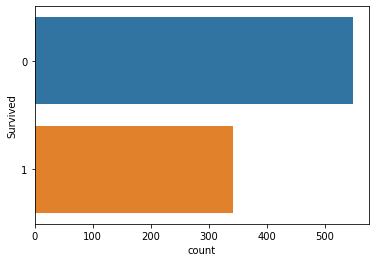

In [9]:
# visualizing target variable

sns.countplot(y= train_df['Survived'])

**Note**
- 0 = Died
- 1 = Survived

We can clearly see that most of the people on the titanic died.

Lets plot the rest of our variables.

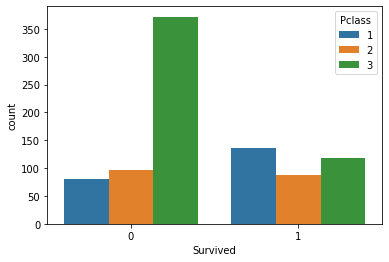

In [10]:
# Pclass survival

sns.countplot(data=train_df,x='Survived',hue='Pclass')


- It is clear that most of the people that died that night where from the third class.
- We can also see that most of the survivors were from class 1 but in general the class survival seems more evenly distributed.


C:\Users\zari0\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\zari0\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


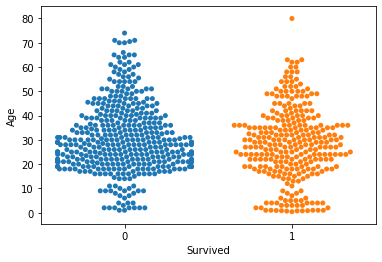

In [11]:
# age vs survival

sns.swarmplot(x='Survived',y='Age',data=train_df)

- We can see that most of the survivors and deceased were from the ages of 20-40. That's probably where the average age of passengers lies. 

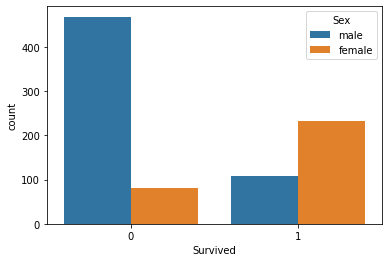

In [12]:
# sex vs survived

sns.countplot(x='Survived',hue='Sex',data=train_df)

- It clear that most of the deceased were men and most of the surviors were women.
- Seemed like there was a strict women/children first policy, i suspect most of the surviving males were in fact children

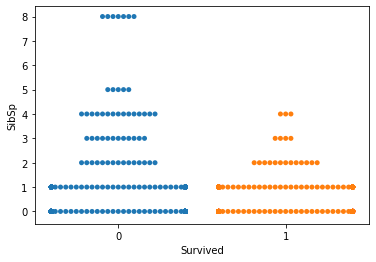

In [13]:
# sipsib vs survived

sns.swarmplot(x='Survived',y='SibSp',data=train_df)

- Values higher than 1 suggest the existence of families aboard as there would be 2 or more sublings abord. 
- 0 and 1 seems to hold most of the data as most people proably travelled alone, with their spouse, or with a 1 sibling.

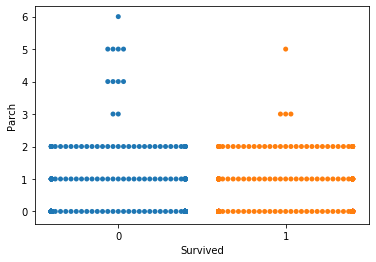

In [14]:
# Parch vs survived

sns.swarmplot(x='Survived',y='Parch',data=train_df)

- similar to the above, most of the people are concentrated on 0,1,2 as you were either alone, or had 1 or both your parents with you/ had 1 or two children with you.

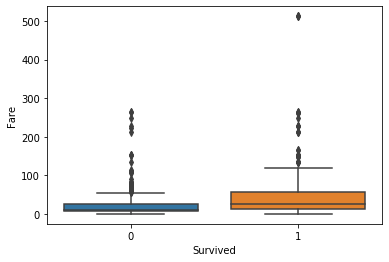

In [15]:
# survived vs price

sns.boxplot(x='Survived',y='Fare',data=train_df)

- Not suprisingly, those that survived paid higher average prices than those that died that night. 
- Knowing that mostly women survived that night, it could be that most women on the ship were of higher income.
- Since this happened in the early 1900's 

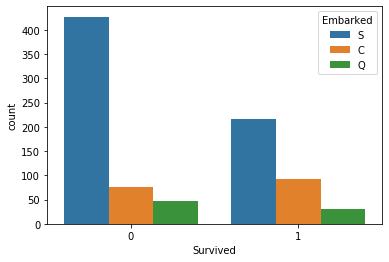

In [16]:
# embarked vs survived

sns.countplot(x='Survived',hue='Embarked',data=train_df)

- seems like most of the passengers aboard embarked in southampton.
- The maiden voyage began in southampton and therefore would be were most of the crew and some passengers got on.
- the folks that boarded Cherbough, were mostly wealthy individuals and Queenstown had mostly third class passengers. 

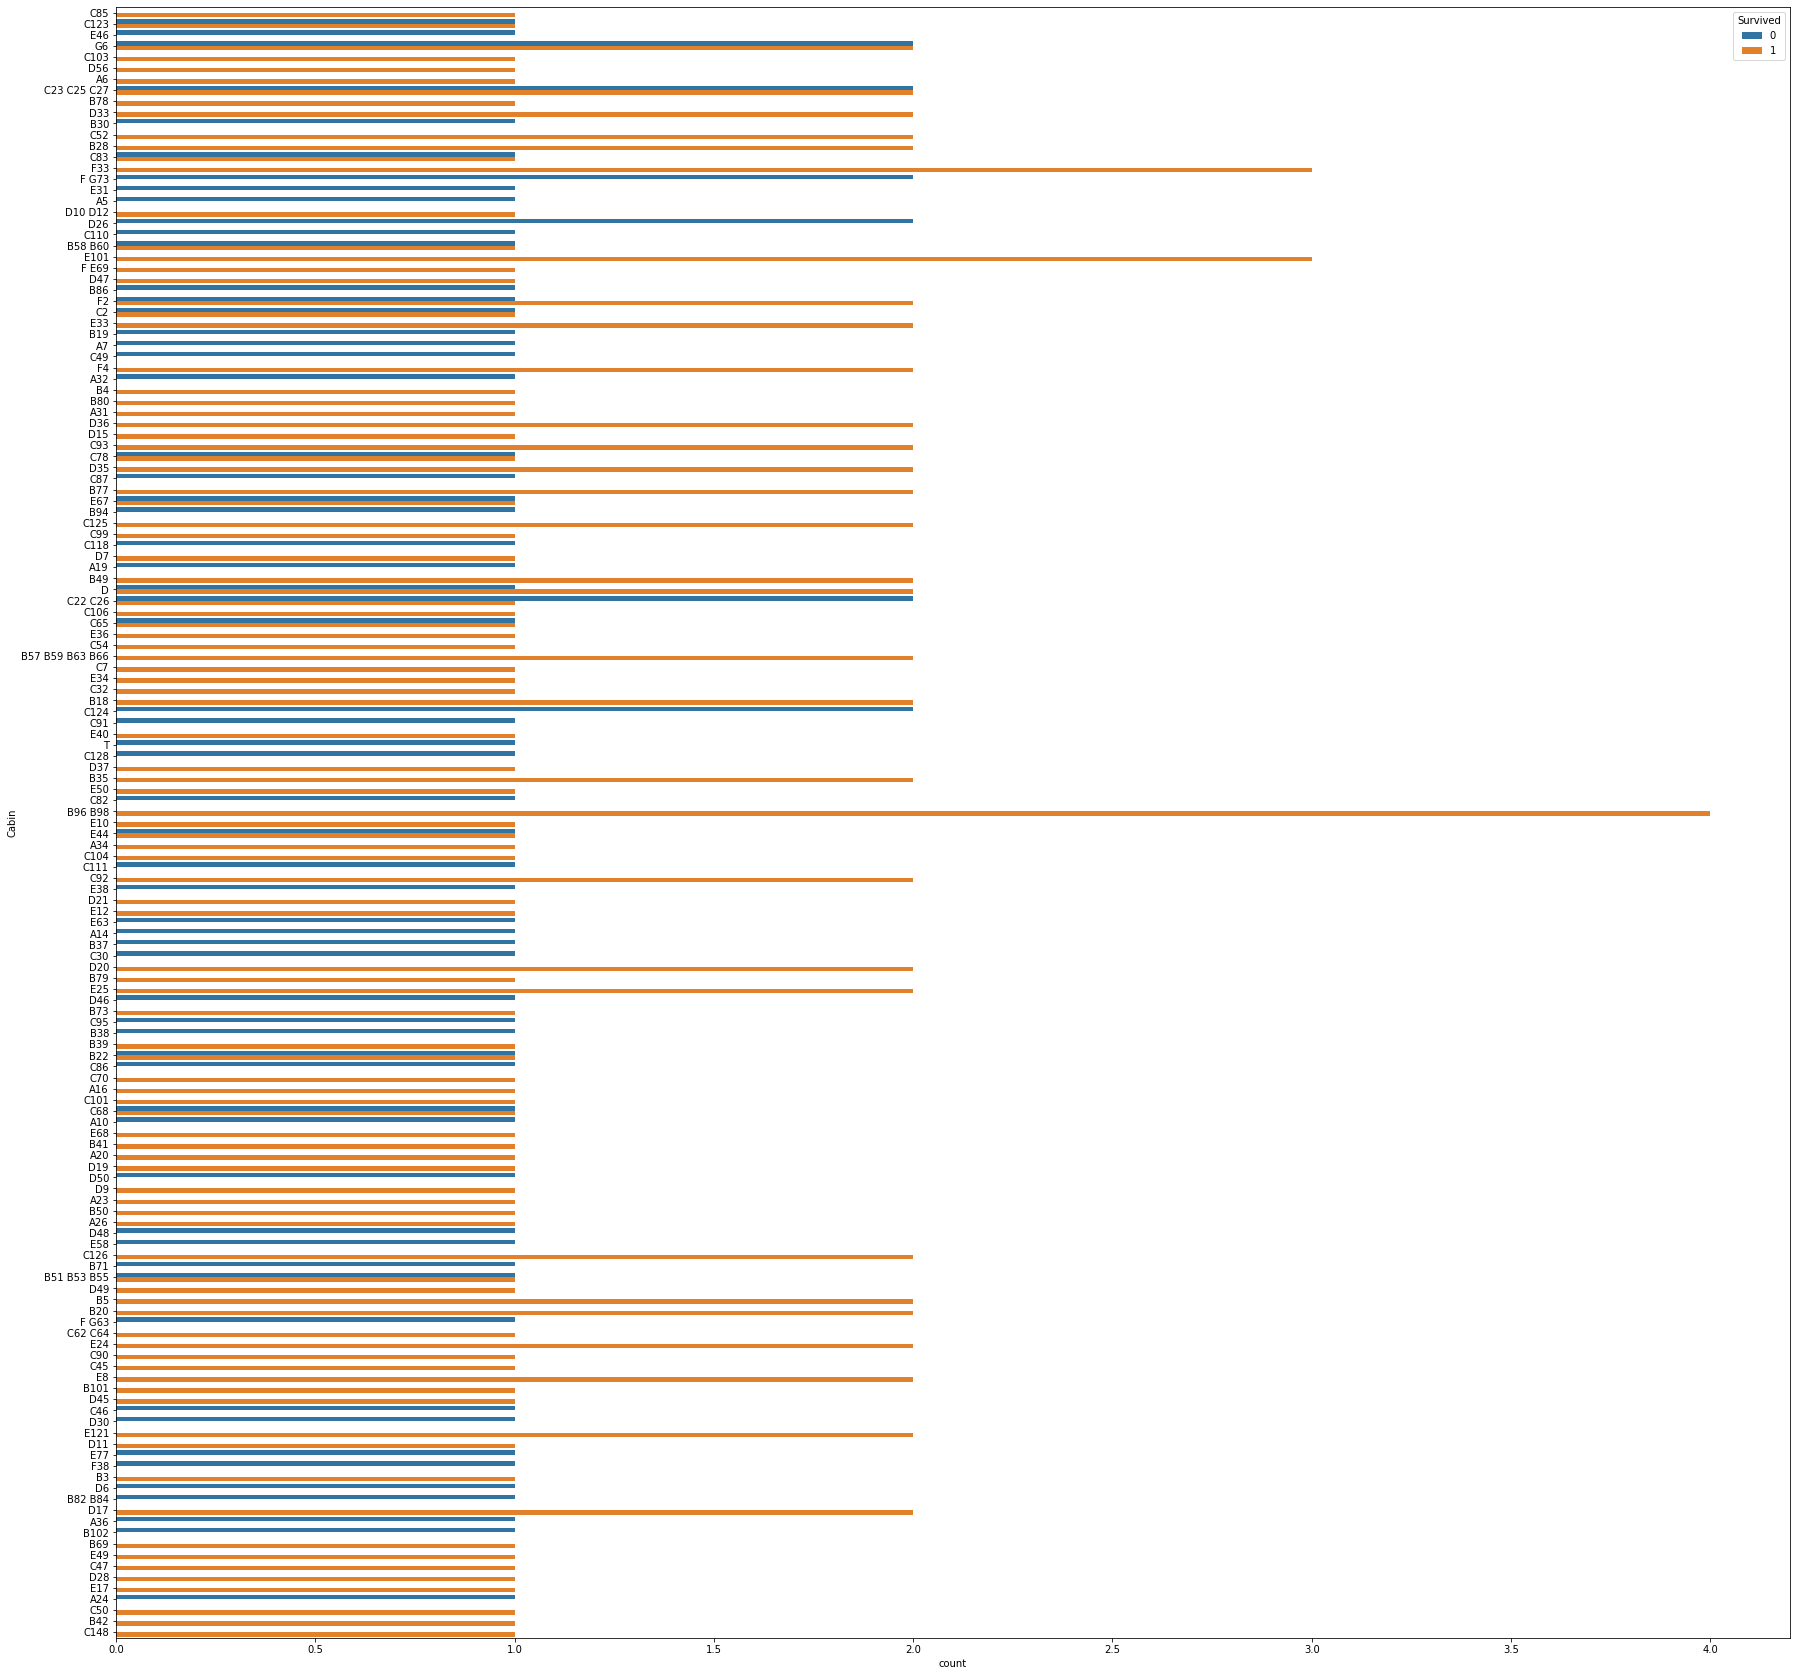

In [17]:
fig,ax = plt.subplots(figsize=(30,30))
sns.countplot(y='Cabin',hue='Survived',data=train_df,ax=ax)

- lots of values going on here. 
- Most of the cabins had an even amount of survivors and deaths
- There exist outliers that mostly survived 

## Dealing with missing Data

Let's get a sense of our missing values

In [18]:
train_data_na = (train_df.isnull().sum()/len(train_df))*100
train_data_na = train_data_na.drop(train_data_na[train_data_na ==0].index).sort_values(ascending=False)
missing_training_data = pd.DataFrame({'Missing Ratio':train_data_na})
missing_training_data

,Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


Lets get a better visual of our training data

Text(0.5, 1.0, 'Percent missing data by feature')

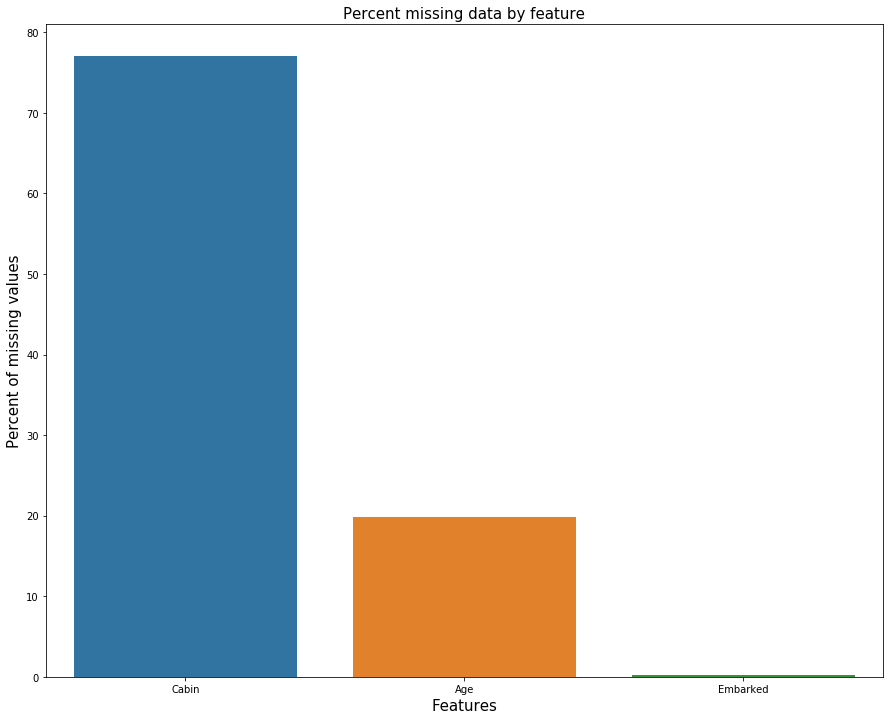

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- I believe that the cabin column can be removed, We capture sufficient information relating to living condition through the ticket fare and cabin has near 80% of its data missing so imputing would only create a huge bias.

- The age missing values can be imputed with the average age, we can test different groupings of average age to see which makes the most sense

- embarked can be imputed depending on their fare price, as lower class tickets were shown to come from Queenstown and Cherbourgh has mostly wealthy individuals

In [20]:
train_df.drop(['Cabin'],axis=1,inplace=True)


In [21]:
train_df['Embarked'] = train_df.groupby(['Pclass','Sex'])['Embarked'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))
train_df['Age'] = train_df.groupby(['Embarked','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())).round(0).astype(int)


Lets check for any remaining values

In [22]:
train_data_na = (train_df.isnull().sum()/len(train_df))*100
train_data_na = train_data_na.drop(train_data_na[train_data_na ==0].index).sort_values(ascending=False)
missing_training_data = pd.DataFrame({'Missing Ratio':train_data_na})
missing_training_data

,Missing Ratio


## imputing test data missing values

we will deal with the missing values in test data using the same approach as the training data.

Lets a visual on what data is missing in our testing dataset

In [23]:
test_data_na = (test_df.isnull().sum()/len(test_df))*100
test_data_na = test_data_na.drop(test_data_na[test_data_na ==0].index).sort_values(ascending=False)
missing_testing_data = pd.DataFrame({'Missing Ratio':test_data_na})
missing_testing_data

,Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


Text(0.5, 1.0, 'Percent missing data by feature')

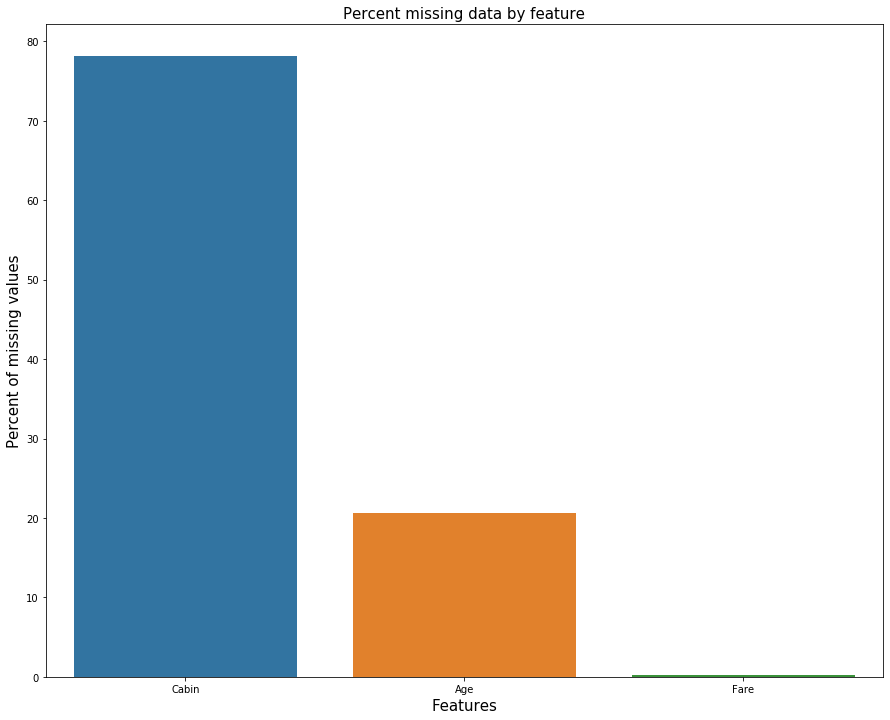

In [24]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=test_data_na.index, y=test_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


similar to the training dataset, cabin and age are missing, but also Fare has some missing values. We will deal with the first two the same way as the training dataset and will use a similar grouping that was used for age.

In [25]:
test_df.drop(['Cabin'],axis=1,inplace=True)
test_df['Age'] = test_df.groupby(['Embarked','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())).round(0).astype(int)



In [26]:
test_df['Fare'] = test_df.groupby(['Embarked','Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean())).round(4)

In [27]:
test_data_na = (test_df.isnull().sum()/len(test_df))*100
test_data_na = test_data_na.drop(test_data_na[test_data_na ==0].index).sort_values(ascending=False)
missing_testing_data = pd.DataFrame({'Missing Ratio':test_data_na})
missing_testing_data

,Missing Ratio


## Dummy variable encoding

we will encode the embarked column with dummy variables to pass to our models...

we will use dummy variables as these variable dont necessarily have an order in their representation.


In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

train_df_size = len(train_df)

all_df = pd.concat(objs=[train_df,test_df],axis=0)

encoded_all_df = pd.get_dummies(data=all_df,columns=['Embarked','Sex'])

encoded_train_df = encoded_all_df[:train_df_size]
encoded_test_df = encoded_all_df[train_df_size:]

encoded_test_df.drop(['Survived'],axis=1,inplace=True)

C:\Users\zari0\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
C:\Users\zari0\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
encoded_train_df.shape

(891, 12)

## Modeling 

We will use various models to predict surivial rate given our training data and validate it using our test set.
Since this problem is a classification problem, we will begin with a logistic regression for simplicity and move on to more advanced models like svm, random forest, and gradient boosters. 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
#features and train/test split

features = ['Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Embarked_Q','Embarked_S','Embarked_C','Sex_male','Sex_female']
target = 'Survived'

X_train,X_test, y_train, y_test = train_test_split(encoded_train_df[features],encoded_train_df[target],
                                                  test_size=.20,random_state=42)


Lets initialize our base models and store them in a dictionary with their respective names

In [32]:
# initialize all our models

classifier_models = {}

log_regressor = LogisticRegression()
svm_classifier = SVC(kernel='linear')
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()

classifier_models['log_regressor'] = log_regressor
classifier_models['svm_classifier'] = svm_classifier
classifier_models['naive_bayes_classifier'] = naive_bayes_classifier
classifier_models['decision_tree_classifier'] = decision_tree_classifier


Now lets fit and score each model by looking at their respective confusion matrix.

The confusion matrix will help visualize how well the models are performing. 

In [33]:
# fit, predict, score each model

# for key in classifier_models.keys():
#     model = classifier_models[key]
#     model.fit(X_train,y_train)
#     print(f"{key} Mean Accuracy is: {model.score(X_test,y_test)}")
#     print(f"{key} Confusion Matrix:\n{confusion_matrix(y_test,model.predict(X_test))}\n")
    
    

## Ensemble models to help with predictions

we will use a group of "weak" learners to help improve our overall model by combining their results using various
ensenbling techniques.

In [42]:
#Max voting ensemble

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators = classifier_models.items(),voting='hard',n_jobs=-1)
ensemble_model.fit(X_train,y_train)
ensemble_model.score(X_test,y_test)



0.7988826815642458

In [45]:
confusion_matrix(y_test,ensemble_model.predict(X_test))

array([[91, 14],
       [22, 52]], dtype=int64)

Lets try using a more complicated predictive model to try and improve our accuracy

In [43]:
rf_classifier = RandomForestClassifier()      #random forest classifier

rf_classifier.fit(X_train,y_train)
rf_classifer_predictions = rf_classifier.predict(X_test)
rf_score = rf_classifier.score(X_test,y_test)

print(f"Accuracy of Random Forest Regressor: {rf_score}\n")

Accuracy of Random Forest Regressor: 0.8212290502793296



C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
rf_conf_matrix = confusion_matrix(y_test,rf_classifer_predictions)
rf_conf_matrix

array([[91, 14],
       [18, 56]], dtype=int64)

We can see that our untuned random forest classifer worked slightly better out of the box than the logistic regressor...
Also seems like there were more false negatives being predicted in both models than false postives. 

In [54]:
#bagging classifier

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator= LogisticRegression(),random_state=42)

bagging_clf.fit(X_train,y_train)

print(f"Bagging Classifier Score:{bagging_clf.score(X_test,y_test)}\n")
print(f"Bagging Clasifier confusion matrix:\n{confusion_matrix(y_test,bagging_clf.predict(X_test))}")

Bagging Classifier Score:0.7932960893854749

Bagging Clasifier confusion matrix:
[[89 16]
 [21 53]]


C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zari0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t